# 120 years of Olympic History

## Data Sources
The dataset consist of details on the olympics held from 1896 to 2016.

The file *athlete_events.csv* contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

ID - Unique number for each athlete;

Name - Athlete's name;

Sex - M or F;

Age - Integer;

Height - In centimeters;

Weight - In kilograms;

Team - Team name;

NOC - National Olympic Committee 3-letter code;

Games - Year and season;

Year - Integer;

Season - Summer or Winter;

City - Host city;

Sport - Sport;

Event - Event;

Medal - Gold, Silver, Bronze, or NA.

The file *noc.csv* contains 230 rows and 3 columns;


# Objectives

Create an interactive dashboard showing the following data points:

-  Country
-  Type of Games
-  Medals won split by event

### Success Metrics

-  Something is working
-  Lots of visualizations
-  Try using Bokeh


In [1]:
import numpy as np #Linear algebra
import pandas as pd ## data processing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
games=pd.read_csv('athlete_events.csv')
games.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
noc=pd.read_csv('noc_regions.csv')
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# Use Pandas merge to merge data with NOC (left)
game_noc=pd.merge(games,noc,how='left',on='NOC')
# Now drop duplicates 
game_noc.drop_duplicates(inplace=True,keep=False)
game_noc.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
medal=game_noc.groupby(['region','Medal'])['Medal'].count()
medal=medal.unstack(level=-1,fill_value=0).reset_index()
medal.head()

Medal,region,Bronze,Gold,Silver
0,Afghanistan,2,0,0
1,Algeria,8,5,4
2,Argentina,91,91,92
3,Armenia,9,2,5
4,Australia,522,368,459


In [6]:
medal['TotalMedals']=medal['Bronze']+medal['Silver']+medal['Gold']
medal.head()

Medal,region,Bronze,Gold,Silver,TotalMedals
0,Afghanistan,2,0,0,2
1,Algeria,8,5,4,17
2,Argentina,91,91,92,274
3,Armenia,9,2,5,16
4,Australia,522,368,459,1349


## Showing USA gold medals per sport

In [7]:
Country_Gold=game_noc[(game_noc['region']=='USA') & (game_noc['Medal']=='Gold')]
champ1=Country_Gold.groupby('Sport').size().to_frame().reset_index()
champ1.columns=['Sport','Count']
champ1.sort_values(by='Count',ascending=False,inplace=True)
champ1

,Sport,Count
34,Swimming,649
3,Athletics,542
5,Basketball,281
25,Rowing,186
28,Shooting,117
15,Football,66
27,Sailing,60
18,Gymnastics,60
19,Ice Hockey,56
43,Wrestling,52


Text(0.5, 1.0, 'Games where USA has won Gold maximum times')

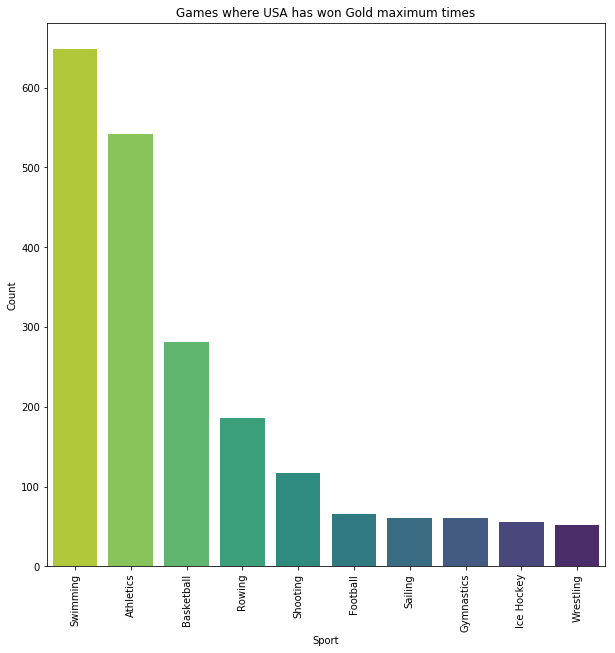

In [8]:
plt.figure(figsize=(10,10))
ax=sns.barplot(champ1['Sport'].head(10),champ1['Count'].head(10),palette=sns.color_palette('viridis_r',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
ax.set_title('Games where USA has won Gold maximum times')

## Showing UK gold medals per sport

In [9]:
UK_Gold=game_noc[(game_noc['region']=='UK') & (game_noc['Medal']=='Gold')]
champ2=Country_Gold.groupby('Sport').size().to_frame().reset_index()
champ2.columns=['Sport','Count']
champ2.sort_values(by='Count',ascending=False,inplace=True)
champ2

,Sport,Count
34,Swimming,649
3,Athletics,542
5,Basketball,281
25,Rowing,186
28,Shooting,117
15,Football,66
27,Sailing,60
18,Gymnastics,60
19,Ice Hockey,56
43,Wrestling,52


Text(0.5, 1.0, 'Games where UK has won Gold maximum times')

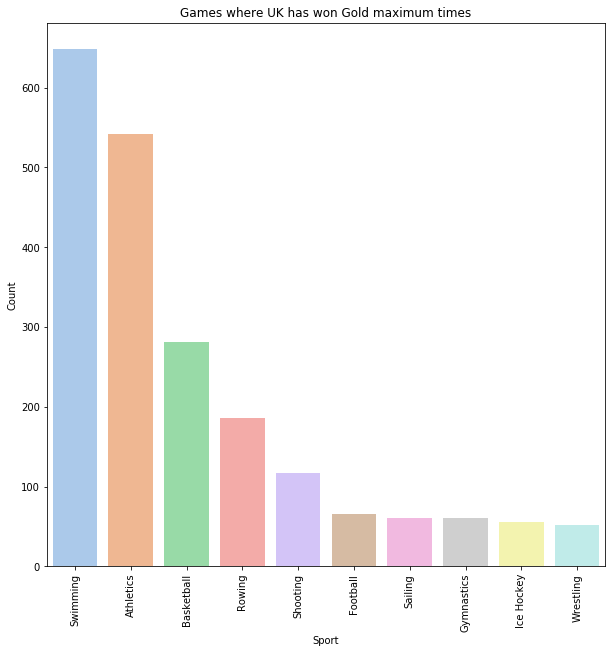

In [10]:
plt.figure(figsize=(10,10))
ax=sns.barplot(champ2['Sport'].head(10),champ2['Count'].head(10),palette=sns.color_palette('pastel',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Count',fontsize=10)
ax.set_title('Games where UK has won Gold maximum times')

In [11]:
medal2=medal.sort_values(['TotalMedals'], ascending=False)
medal2.head()

Medal,region,Bronze,Gold,Silver,TotalMedals
125,USA,1358,2638,1641,5637
100,Russia,1178,1599,1170,3947
41,Germany,1260,1301,1195,3756
124,UK,651,676,739,2066
38,France,666,497,594,1757


In [12]:
def countryname(x):
    if medal['region'] == x:
        medaloutput= medal.loc[medal['region'] == 'x']
        return medaloutput
    else:
        print ("Unknown Country, please try again")
    

## Top 20 countries in terms of total medals won

Text(0.5, 1.0, 'Total Medal Count of Top 20 Countries in Olympics')

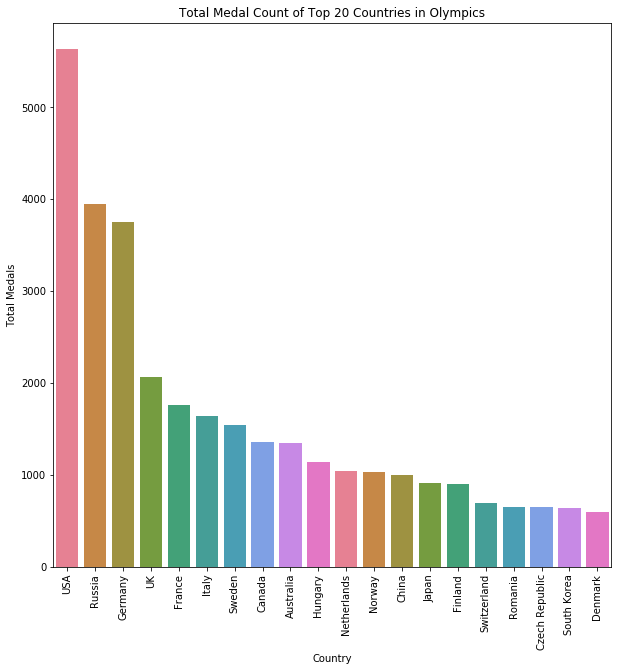

In [13]:
plt.figure(figsize=(10,10))
ax=sns.barplot(medal2['region'].head(20),medal2['TotalMedals'].head(20),palette=sns.color_palette('husl',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Country',fontsize=10)
ax.set_ylabel('Total Medals',fontsize=10)
ax.set_title('Total Medal Count of Top 20 Countries in Olympics')

## Total number of sports a country competed in

In [14]:
total_games=game_noc.groupby('region')['Sport'].nunique().to_frame().reset_index()
total_games.rename({'Sport':'TotalGames'},inplace=True,axis=1)
total_games=total_games.sort_values(['TotalGames'], ascending=False)
total_games.head(10)

,region,TotalGames
190,UK,59
191,USA,58
63,France,57
33,Canada,53
67,Germany,53
10,Australia,52
87,Italy,52
90,Japan,52
177,Switzerland,50
151,Russia,49


Text(0.5, 1.0, 'Total number of different sport events a country competed in')

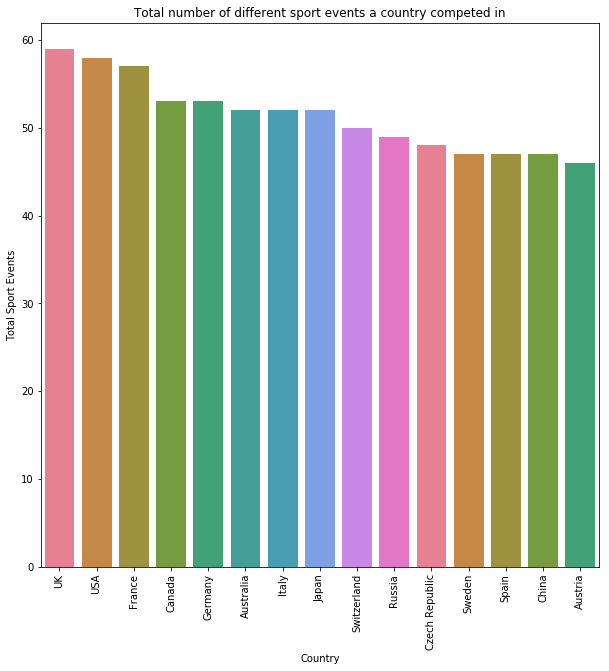

In [15]:
plt.figure(figsize=(10,10))
ax=sns.barplot(total_games['region'].head(15),total_games['TotalGames'].head(20),palette=sns.color_palette('husl',10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Country',fontsize=10)
ax.set_ylabel('Total Sport Events',fontsize=10)
ax.set_title('Total number of different sport events a country competed in')

## Seaborn and Bokeh


In [16]:
import seaborn as sns
# set below does wrapper
sns.set()

## Plotting country v total medals

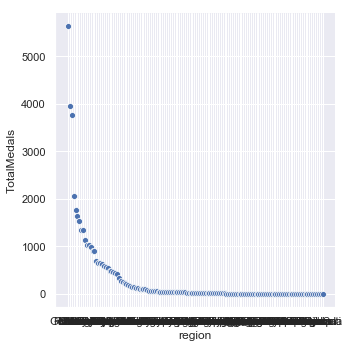

In [17]:
sns.relplot(x='region', y='TotalMedals', data=medal2)

## Plotting Country v Total Medals and Gold as Hue

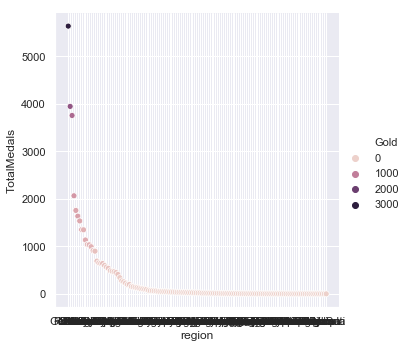

In [18]:
sns.relplot(x='region', y='TotalMedals', hue='Gold', data=medal2)

In [19]:
# get bokeh function to plot a figure and read the data in columns
from bokeh.plotting import figure, ColumnDataSource
# get bokeh function for outputs we want
from bokeh.io import output_file, show, output_notebook
# get bokeh to use HoverRool
from bokeh.models import HoverTool
# display bokeh figures inline (for jupyer notebook)
output_notebook()

Loading BokehJS ...

# Plotting Total Medals V Gold for each Country

In [20]:
# create a ColumnDataSource from df: source
source=ColumnDataSource(medal2)
# create a figure p with 'hover' tool
p=figure (tools=['hover'])
# in figure p, display the data as circles (dots)
p.circle('TotalMedals','Gold', source=source)
#specify the HoverTool by adding our Names to map against .csv column names
hover=HoverTool(tooltips=[('Country','@region'), ('Total', '@TotalMedals'), ('Gold', '@Gold'), ('Silver', '@Silver'),('Bronze', '@Bronze')])

# change just some things about the x-axes
p.xaxis.axis_label = "Total Medals"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "pink"

# change just some things about the y-axes
p.yaxis.axis_label = "Gold Medals"
p.yaxis.major_label_text_color = "gold"
p.yaxis.major_label_orientation = "vertical"

p.add_tools (hover)
show(p)

# It is linear relationship

# What we could do next?
1. Define a function to input a country name
2. For each country, extract data from medals2, as well as most golds won, and draw charts
3. Compare results for input country against all time leader USA

# Avoid using Edge - Chrome is better